## 数据理解

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimSun']  # Windows
plt.rcParams['axes.unicode_minus'] = False

tips_df = sns.load_dataset("tips")
print("数据前5行：\n", tips_df.head())
print("\n数据结构：\n", tips_df.info())
print("\n统计描述：\n", tips_df.describe(include='all'))


数据前5行：
    total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB

数据结构：
 None

统计描述：
         total_bill         tip   sex smoker  day    time        size
count   244.000000  244.000000   

## 导出为excel文件

In [6]:
tips_df.to_excel("tips_dataset.xlsx",index=False)

## 数据清洗

In [10]:
#检查缺失值
print("缺失值统计：\n", tips_df.isnull().sum())

#处理异常值
tips_df['tip_percentage'] = tips_df['tip']/ tips_df['total_bill'] * 100
q_low = tips_df['tip_percentage'].quantile(0.01)
q_high = tips_df['tip_percentage'].quantile(0.99)
tips_clean = tips_df[(tips_df['tip_percentage'] > q_low) & (tips_df['tip_percentage'] < q_high)]

#检查清洗后数据
print("清洗后数据量：", len(tips_clean))

缺失值统计：
 total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64
清洗后数据量： 238


## 统计归纳

In [11]:
#基础统计
print("小费比例均值：", tips_clean['tip_percentage'].mean())

#分组统计
print("\n不同用餐时间的统计：\n", tips_clean.groupby('time').agg({
    'total_bill': 'mean',
    'tip':'median',
    'tip_percentage':'mean'
}))

#相关性分析
print("\n数值变量相关性：\n", tips_clean[['total_bill','tip','size']].corr())

小费比例均值： 15.812696359099762

不同用餐时间的统计：
         total_bill   tip  tip_percentage
time                                    
Lunch    17.168676  2.25       16.412793
Dinner   20.804941  3.00       15.572658

数值变量相关性：
             total_bill       tip      size
total_bill    1.000000  0.730372  0.606704
tip           0.730372  1.000000  0.492422
size          0.606704  0.492422  1.000000


## 数据可视化

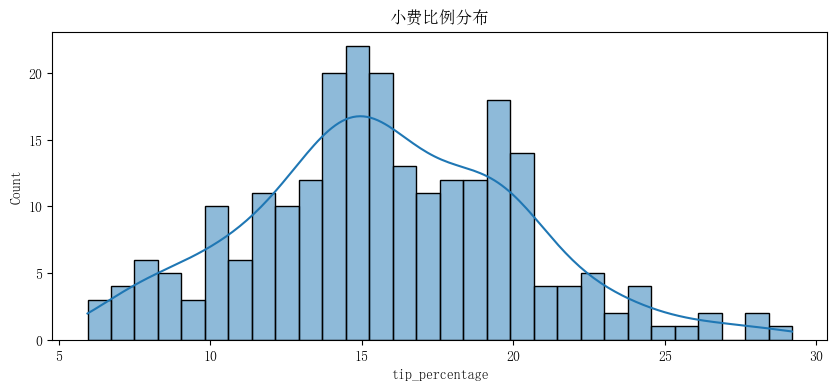

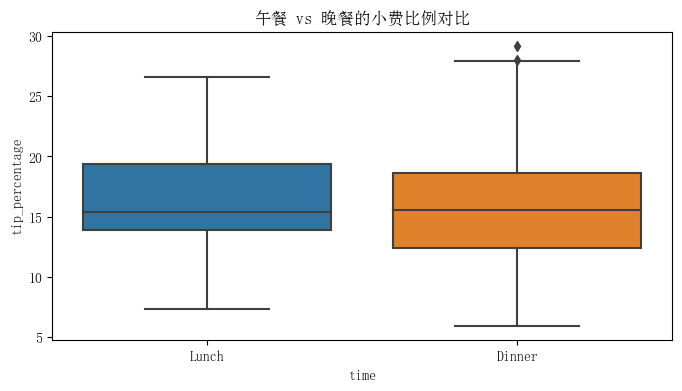

C:\app\anoconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\app\anoconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


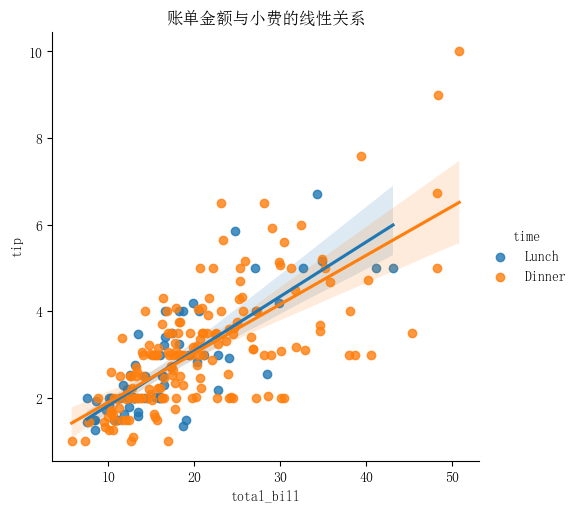

C:\app\anoconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


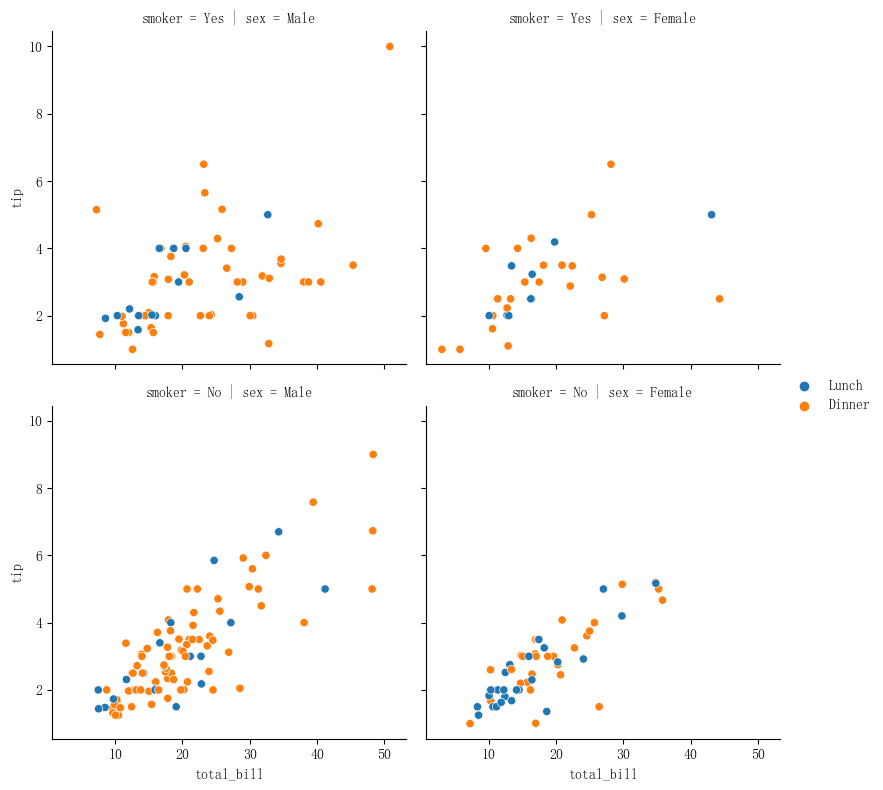

In [15]:
#1.小费比例分布直方图
plt.figure(figsize=(10, 4))
sns.histplot(data=tips_clean, x='tip_percentage',bins=30, kde=True)
plt.title("小费比例分布")
plt.show()

#2.用餐时间与小费箱线图
plt.figure(figsize=(8, 4))
sns.boxplot(data=tips_clean, x='time', y='tip_percentage')
plt.title("午餐 vs 晚餐的小费比例对比")
plt.show()

#3. 账单金额与小费的回归关系
sns.lmplot(data=tips_clean, x='total_bill', y='tip', hue='time', height=5)
plt.title("账单金额与小费的线性关系")
plt.show()

#4.分面网格图（性别和吸烟状态分组）
g = sns.FacetGrid(tips_df, col='sex', row='smoker', height=4)
g.map_dataframe(sns.scatterplot, x='total_bill',y='tip',hue='time')
g.add_legend()
plt.show()

In [14]:
#透视表（不同用餐时间+性别的小费均值）
pivot_table = pd.pivot_table(tips_df, 
                            values='tip', 
                            index='time', 
                            columns='sex', 
                            aggfunc='mean')
print("不同时段性别的小费均值：\n", pivot_table)

#交叉表（吸烟与性别的频次统计）
cross_tab = pd.crosstab(tips_df['smoker'], tips_df['sex'], normalize='index')
print("\n吸烟与性别分布：\n", cross_tab)

不同时段性别的小费均值：
 sex         Male    Female
time                      
Lunch   2.882121  2.582857
Dinner  3.144839  3.002115

吸烟与性别分布：
 sex         Male    Female
smoker                    
Yes     0.645161  0.354839
No      0.642384  0.357616
